# Implementando Arquitectura VGG

Se importa un repositorio en github asociado a Marcelo Becerra Rozas de RUT: 19.339.344-6 alumno del ramo de Redes Neuronales Profundas. El objetivo de esto es, para facilidad de uso de los dataSets

In [1]:
!git clone https://github.com/imaberro/RNP-DOCTORADO.git

Cloning into 'RNP-DOCTORADO'...
remote: Enumerating objects: 1131, done.
remote: Counting objects: 100% (1131/1131), done.
remote: Compressing objects: 100% (1115/1115), done.
remote: Total 122108 (delta 9), reused 1130 (delta 8), pack-reused 120977
Receiving objects: 100% (122108/122108), 215.44 MiB | 33.36 MiB/s, done.
Resolving deltas: 100% (1117/1117), done.
Checking out files: 100% (132650/132650), done.


In [2]:

# Librerías de Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import ZeroPadding2D

from keras.callbacks import CSVLogger

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())




[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2572095732786004127
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14638920512
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4767795275520533247
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [3]:
# Inicializamos la red convolucional
classifier = Sequential()

La arquitectura que se está implementando en esta primera instancia es la conocida como VGG.

Se tienen consideradas tres layers convolucionales de kernel 2x2, 2x1 y 1x2 respectivamente de 32 pixeles cada una y con un input o imágenes de 64x64 píxeles RGB para el primer layer. Cada layer contempla activación de tipo ReLu

Por cada layer se realiza una normalización, luego de las tres layers, se realiza un MaxPooling de tamaño 2x2.

Los siguientes tres layers tienen 48 pixeles con un kernel de 2x2. Nuevamente por cada layer se realizará un normalización de la salida. Y finalmente, otra vez un MaxPooling de 2x2.

Los siguientes layers (Siempre separandolos de 3 en 3) están contemplados con tamaños de 64, 80 y 96 píxeles con un kernel de 2x2 y MaxPooling de 2x2 también.

Finalmente tenemos 2 capas Dense de tamaño 800 con activación 800 y finalmente la última de tamaño 200 y activación de tipo Softmax.



In [4]:
#Convoluciones
classifier.add(Conv2D(32, (2, 2), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(32, (2, 1), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(32, (1, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(48, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(48, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(48, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(80, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(80, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(80, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(96, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(96, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(96, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 800, activation = 'relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.00001)))
classifier.add(Dense(units = 800, activation = 'relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.00001)))
classifier.add(Dense(units = 200, activation = 'softmax'))

In [5]:
# Compilamos la red

from keras.callbacks import LearningRateScheduler
learning_rate = 1e-4
lr = 0.001
def updateLR(epoch, lr):
    if(epoch % 10 == 0 and epoch !=0):
        lr *= 0.5
        print("update",lr)
    return lr

lrate = LearningRateScheduler(updateLR)

Adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00014, amsgrad=False)
classifier.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 63, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 63, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0

Para los ajustes de las imágenes y de la red, se optó por algunas opciones definidas por ImageDataGenerator, el primero un reescalado, shear y zoom con rango de 0,2, un flip de tipo horizontal, una rotación de imágen de 90°, cambios de tamaños de imágenes tanto horizontal como vertical y finalmente un aumento de brillo de rangos entre 0,2 y 0,8.

Un Batchsize de 23 y para cada imágen contenida del Dataset será estandarizada con un tamaño de 64x64 píxeles. Analizando un total de 100.000 imágenes dividas en 200 tipos de clases.

In [6]:
# Ajustamos la red a las imágenes

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=(0.2, 0.8)
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/train',
                                                 target_size = (64, 64),
                                                 batch_size = 23,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/validation',
                                            target_size = (64, 64),
                                            batch_size = 23,
                                            class_mode = 'categorical')

print(training_set)

csv_logger = CSVLogger('training.log')

history = classifier.fit(training_set,
                         epochs = 30,
                         validation_data = test_set,
                         verbose=1)




Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/30
4348/4348 [==============================] - 207s 46ms/step - loss: 5.1590 - accuracy: 0.0168 - val_loss: 5.4057 - val_accuracy: 0.0217
Epoch 2/30
4348/4348 [==============================] - 196s 45ms/step - loss: 4.7781 - accuracy: 0.0384 - val_loss: 4.8052 - val_accuracy: 0.0454
Epoch 3/30
4348/4348 [==============================] - 196s 45ms/step - loss: 4.5899 - accuracy: 0.0560 - val_loss: 4.7534 - val_accuracy: 0.0495
Epoch 4/30
4348/4348 [==============================] - 195s 45ms/step - loss: 4.4775 - accuracy: 0.0680 - val_loss: 4.6233 - val_accuracy: 0.0594
Epoch 5/30
4348/4348 [==============================] - 195s 45ms/step - loss: 4.3838 - accuracy: 0.0774 - val_loss: 4.6748 - val_accuracy: 0.0640
Epoch 6/30
4348/4348 [==============================] - 194s 45ms/step - loss: 4.3003 - accuracy: 0.0911 - val_loss: 4.3241 - val_accuracy: 0.0862
Epoch 7/30
4348/4348 [=====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


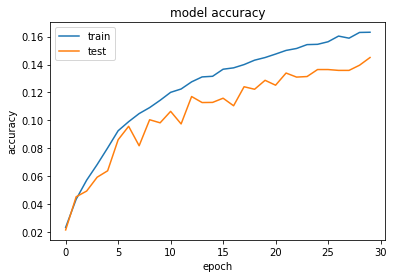

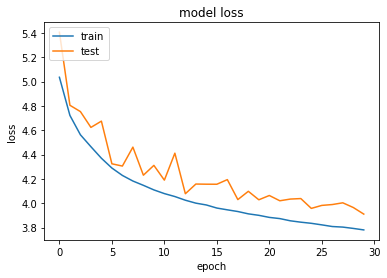

In [7]:
import matplotlib.pyplot as plt


print(history.history.keys())
# Graficamos el accuracy y el loss.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Los resultados demuestran que tanto el accuracy como el loss tienen una tendencia correcta, suben y se reducen respectivamente. Sin embargo se pueden observar ciertos comprotamientos que quizás se puedan mejorar con otro tipo de tunning en los parámetros o en las arquitecturas.

Lo primero que se puede observar es que tanto el Accuracy como el Loss, tal y como se mencionó previamente su tendencia es a aumentar y a bajar. Los valores del accuracy tienen a ser bajos, rodeando el 16% con 30 epochs. Se considera que el bajo valor del accuracy se vea afectado por la cantidad de clases que tiene el Dataset.

Lo segundo que se puede observar es que tanto el Accuracy como el Loss, tiene algunos picos que descienden y no se puede ver una linea curvilinea como lo sería la linea del Train. Esto se cree que se debe a los tipos de parámetros que se usaron en el DataAugmentation, quizás con un tunning de parámetros distinta pueda conseguir reducir considerablemente o en su totalidad los picos.

# **Este mismo comportamiento se verá en la siguiente arquitectura que se presenta.**

# Implementando Arquitectura AlexNet



In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8534540867473018067
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14638920512
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16469653622173978716
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [9]:
# Inicializamos la red convolucional
classifier = Sequential()

classifier.add(ZeroPadding2D((1,1),input_shape = (64, 64, 3)))

A diferencia de VGG, en este caso con AlexNet tenemos solo dos layers convolucionales en vez de tres antes de cada MaxPooling.

El primer layer de los dos tiene un tamaño de 48 y un kernel de 5x5 con activación de tipo Relu, para el caso del segundo layer se asignó un tamaño de 128 con un kernel de 3x3 y también activación Relu.

El segundo layer solo contempla el mismo antes del MaxPooling, en este caso tiene tamaño 192 con un kernel de 2x2.

Los siguientes dos layers tienen tamaño de 192 y 128 con kernel de 2x2.

Finalmente las dos primeras capas Dense de tamaño 1024 de activación tipo Relu con un dropout de 0,02 y finalmente la última capa con un tamaño de 200 con activación de tipo Softmax.

In [10]:
# Convoluciones
classifier.add(Conv2D(48, (5, 5), activation = 'relu'))

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convoluciones
classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(192, (2, 2), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convoluciones
classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(192, (2, 2), activation = 'relu'))

# Convoluciones
classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(128, (2, 2), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate=0.20))

classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate=0.20))

classifier.add(Dense(units = 200, activation = 'softmax'))


In [11]:
# Compilamos la red
Adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
classifier.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])






#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

El procesado de imágenes será el mismo que se utilizó con la arquitectura de VGG. Sin embargo el batch size en este caso se asignó uno de tamaño 256.

In [12]:
# Ajustamos la red a las imágenes

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=(0.2, 0.8)
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/train',
                                                    target_size = (64, 64),
                                                    batch_size = 256,
                                                    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/validation',
                                            target_size = (64, 64),
                                            batch_size = 256,
                                            class_mode = 'categorical')

history = classifier.fit_generator(training_set,
                            epochs = 25,
                            validation_data = test_set,
                            verbose=1)


Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
391/391 [==============================] - 191s 482ms/step - loss: 5.2169 - accuracy: 0.0102 - val_loss: 4.8340 - val_accuracy: 0.0424
Epoch 2/25
391/391 [==============================] - 186s 476ms/step - loss: 4.8523 - accuracy: 0.0403 - val_loss: 4.6033 - val_accuracy: 0.0793
Epoch 3/25
391/391 [==============================] - 186s 476ms/step - loss: 4.5644 - accuracy: 0.0701 - val_loss: 4.3727 - val_accuracy: 0.1039
Epoch 4/25
391/391 [==============================] - 185s 474ms/step - loss: 4.3732 - accuracy: 0.0953 - val_loss: 4.2515 - val_accuracy: 0.1108
Epoch 5/25
391/391 [==============================] - 186s 474ms/step - loss: 4.2392 - accuracy: 0.1125 - val_loss: 4.2844 - val_accuracy: 0.1234
Epoch 6/25
391/391 [==============================] - 186s 475ms/step - loss: 4.1196 - accuracy: 0.1277 - val_loss: 4.0953 - val_accuracy: 0.1449
Epoch 7/25
391/391 [==============================] - 186s 476ms/step - loss: 4.0109 - accuracy: 0.1408 - val_loss: 4.0668 -

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Los resultados demuestran que tanto el accuracy como el loss tienen una tendencia correcta, suben y se reducen respectivamente. Sin embargo se pueden observar ciertos comprotamientos que quizás se puedan mejorar con otro tipo de tunning en los parámetros o en las arquitecturas.

Lo primero que se puede observar es que tanto el Accuracy como el Loss, tal y como se mencionó previamente su tendencia es a aumentar y a bajar. Los valores del accuracy tienen a ser bajos, rodeando los 25% con 25 epochs. Se considera que el bajo valor del accuracy se vea afectado por la cantidad de clases que tiene el Dataset.

Lo segundo que se puede observar es que tanto el Accuracy como el Loss, tiene algunos picos que descienden y no se puede ver una linea curvilinea como lo sería la linea del Train. Esto se cree que se debe a los tipos de parámetros que se usaron en el DataAugmentation, quizás con un tunning de parámetros distinta pueda conseguir reducir considerablemente o en su totalidad los picos.

# Modelo Pre-entrenado

Para los modelos Pre-entrenados se utilizó el modelo de VGG16, modelo encontrado en Keras: https://keras.io/api/applications/



In [ ]:
from keras.applications.vgg16 import VGG16                                                     
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.preprocessing import image
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import numpy as np                      


base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(200, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

sgd_opt = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
model.compile(optimizer=sgd_opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
# Ajustamos la red a las imágenes
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1)

test_datagen = ImageDataGenerator(rescale = 1)

training_set = train_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/train',
                                                 target_size = (64, 64),
                                                 batch_size = 23,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/validation',
                                            target_size = (64, 64),
                                            batch_size = 23,
                                            class_mode = 'categorical')


training_set = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/RNP-DOCTORADO/DataImages/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=23,
  label_mode='categorical')

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/RNP-DOCTORADO/DataImages/validation',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=23,
  label_mode='categorical')


history = model.fit(training_set,
                         epochs = 25,
                         validation_data = test_set,
                         verbose=1)


for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

history = model.fit(training_set,
                         epochs = 5,
                         validation_data = test_set,
                         verbose=1)

In [ ]:
import matplotlib.pyplot as plt

hist = history
print(hist.history.keys())
# summarize history for accuracy
#plt.plot(hist.history['categorical_crossentropy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Como se puede observar los valores de Train y Test se mantienen estáticos en 5,277 y 5,270 respectivamente. Se cree que esto se puede deber a que al preprocesado de las imágenes y del modelo pre-entrado se consigue a llegar al punto mínimo o llamemoslo "valle" en un descenso del gradiente que es muy difícil salir.